In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow import keras

Xs = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
ys = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5], dtype=float)

tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(keras.layers.Dense(units=1, input_shape=[1]))

# model.compile(optimizer='sgd', loss='mse')
# model.compile(optimizer='RMSprop', loess='mse' )
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(Xs, ys, epochs=1000, verbose=0)

In [10]:
history_model_1 = history.history

In [11]:
type(history_model_1)

dict

In [12]:
history_model_1.keys()

dict_keys(['loss'])

<AxesSubplot:>

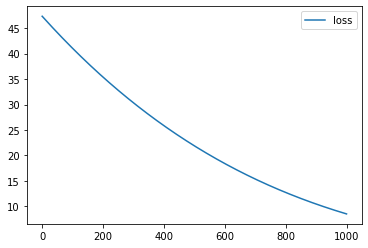

In [13]:
pd.DataFrame(history_model_1).plot()

In [14]:
# Get the slope and bias of the line
w, b = model.layers[0].get_weights()
print('w : ' + str(w))
print('b : ' + str(b))

w : [[-0.49053335]]
b : [0.]


In [15]:
print(model.predict([5.0]))

[[-2.4526668]]


# Save Model
# An entire model can be saved in two different file formats (SavedModel and HDF5).

In [16]:
model_path = 'D:\\Sandbox\\Github\\MODELS\\'
model_file = model_path + '01_house_price'
model_history_file = model_path + '01_house_priceHistoryDict'

## Use SavedModel format

In [17]:
model.save(model_file)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: D:\Sandbox\Github\MODELS\01_house_price\assets


## Use hdf5 format

In [23]:
model.save(model_file+'.h5')

## Save Model's history

In [22]:
with open(model_history_file, 'wb') as file_pi:
    pickle.dump(history_model_1, file_pi)